In [ ]:
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D ,Dropout

In [ ]:
(xtr,ytr),(xte,yte) = tf.keras.datasets.cifar10.load_data()
xtr = xtr/255.0
xte = xte/255.0

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print('Training Set: X=%s, y=%s' % (xtr.shape, ytr.shape))
print('Test: X=%s, y=%s' % (xte.shape, yte.shape))

Training Set: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


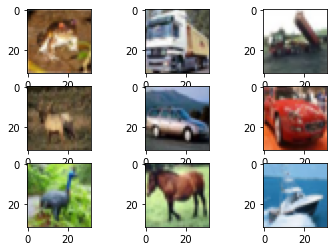

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(xtr[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
ytr=tcg(ytr)
yte=tcg(yte)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=15, batch_size=128)

Epoch 1/15
391/391 [==============================] - 2s 6ms/step - loss: 1.7738 - accuracy: 0.3412 - val_loss: 1.4314 - val_accuracy: 0.4868
Epoch 2/15
391/391 [==============================] - 2s 5ms/step - loss: 1.4520 - accuracy: 0.4711 - val_loss: 1.3213 - val_accuracy: 0.5205
Epoch 3/15
391/391 [==============================] - 2s 5ms/step - loss: 1.3547 - accuracy: 0.5089 - val_loss: 1.2280 - val_accuracy: 0.5750
Epoch 4/15
391/391 [==============================] - 2s 5ms/step - loss: 1.2963 - accuracy: 0.5338 - val_loss: 1.1809 - val_accuracy: 0.5844
Epoch 5/15
391/391 [==============================] - 2s 5ms/step - loss: 1.2406 - accuracy: 0.5563 - val_loss: 1.0974 - val_accuracy: 0.6203
Epoch 6/15
391/391 [==============================] - 2s 5ms/step - loss: 1.1973 - accuracy: 0.5721 - val_loss: 1.0840 - val_accuracy: 0.6213
Epoch 7/15
391/391 [==============================] - 2s 5ms/step - loss: 1.1656 - accuracy: 0.5847 - val_loss: 1.0576 - val_accuracy: 0.6348
Epoch 

In [ ]:
loss, accuracy = model.evaluate(xte, yte)
print("Validation Loss: ", loss)
print("Validation Accuracy: ", accuracy*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.9021 - accuracy: 0.6879
Validation Loss:  0.90212482213974
Validation Accuracy:  68.79000067710876


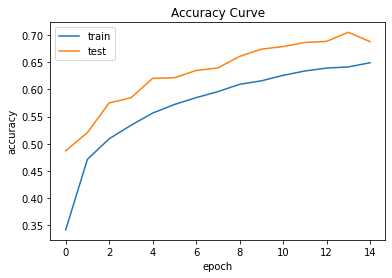

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

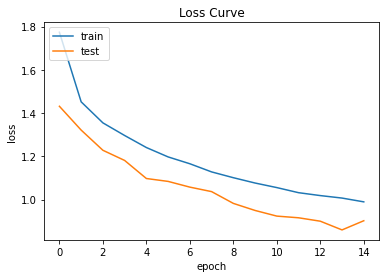

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("cifarCnn.h5")

In [ ]:
model.load_weights("cifarCnn.h5")

In [ ]:
loaded_model = tf.keras.models.load_model("cifarCnn.h5")
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [ ]:
!pip install pyngrok

In [ ]:
!pip install streamlit

     |████████████████████████████████| 7.2MB 4.7MB/s 
     |████████████████████████████████| 102kB 11.2MB/s 
     |████████████████████████████████| 4.4MB 39.2MB/s 
     |████████████████████████████████| 112kB 42.6MB/s 
     |████████████████████████████████| 122kB 40.4MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=3154f067e364facafdeffffe7765e67f7066325bd12ea87b4d056a63ce5cdf98
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=5488df19fb2de137423d7bcbf45601f5d18ef65d153ba6247c411649a7461c78
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for pathtools: filename=pathtools-0.1.2-cp36-none-any.whl size=8785 sha256=2cd5d7a2dbf800bf3e56fc1a275b1890e7286353cf7140bb34597c6c58c45244
  Stored in directory: /root/.cache/pip/whee

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow.compat.v2 as tf
from PIL import Image , ImageOps
import cv2
import numpy as np
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def lm():

 model = tf.keras.models.load_model('/content/cifarCnn.h5')
 return model

model = lm()

st.write("""
# Cifar 10 Clasifier - CNN
""")
file = st.file_uploader("Upload an Image",type=['jpeg','jpg','png'])

def import_and_predict(image_data,model):
  
 size=(32,32)
 img = ImageOps.fit(image_data,size,Image.ANTIALIAS)
 img = np.asarray(img)
 img = img[np.newaxis,...]
 l = np.argmax(model.predict(img))
 i = labels[l]
 return i

if file is None:
 st.text("Pls upload image")
else:
 image = Image.open(file)
 st.image(image,use_column_width=True)
 p = import_and_predict(image,model)
 st.success(str(p))

Overwriting app.py


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2020-09-01 14:34:48--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 107.23.162.152, 34.227.164.168, 54.163.152.154, ...
Connecting to bin.equinox.io (bin.equinox.io)|107.23.162.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.13M  15.8MB/s    in 0.8s    

2020-09-01 14:34:49 (15.8 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13773305/13773305]



In [ ]:
!unzip /content/ngrok-stable-linux-amd64.zip

Archive:  /content/ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


In [ ]:
!./ngrok authtoken 1gucT1g3sK4pHqCpLdQbwzJErD6_51BwECtLjhE9GabADrfXW

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port=8501)
url

'http://39fe5e4825e2.ngrok.io'